# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
!wget https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_month_pr_2023-05.json

--2023-06-26 14:59:27--  https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_month_pr_2023-05.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421 (3.3K) [text/plain]
Saving to: ‘plant02_month_pr_2023-05.json’

plant02_month_pr_20 100%[===================>]   3.34K  --.-KB/s    in 0s      

2023-06-26 14:59:27 (48.4 MB/s) - ‘plant02_month_pr_2023-05.json’ saved [3421/3421]



In [4]:
base_path = './'

In [5]:
import json
ffn = os.path.join(base_path, 'plant02_month_pr_2023-05.json')
with open(ffn, 'r') as f:
    data = json.load(f)


In [6]:
data = data['data_']

In [7]:
data.keys()

dict_keys(['capacity', 'date', 'day_e', 'deg4kw', 'inv_cap', 'inv_deg4kw', 'inv_e', 'inv_name', 'inv_pr', 'month_deg4kw', 'month_inv_deg4kw', 'month_inv_pr', 'month_pr', 'pr', 'sun'])

### 以PR值來呈現

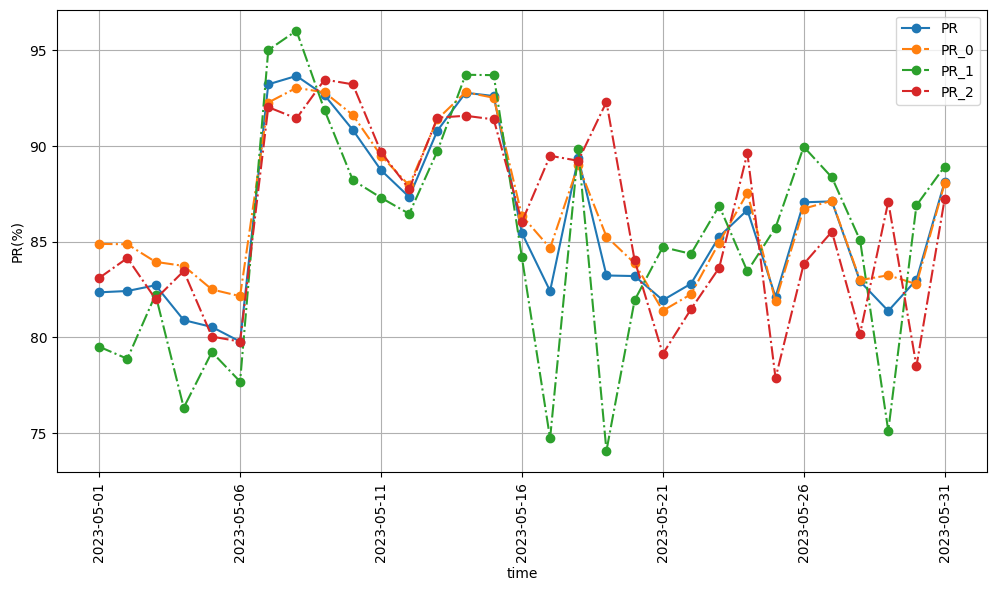

In [8]:
plt.subplots(figsize=(12,6))
plt.plot(data['date'], data['pr'], '-o', label='PR')
#plt.plot(data['date'], data['sun'], '-*', label='sun')
inv_pr = data['inv_pr']
for n in range(len(inv_pr)):
    plt.plot(data['date'], inv_pr[n], '-.o', label='PR_'+str(n))
plt.xlabel('time')
plt.ylabel('PR(%)')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.legend()
plt.show()

- 以plotly呈現

In [9]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['date']
    ,pr = data['pr']
))
inv_pr = data['inv_pr']
for n in range(len(inv_pr)):
    inv_name = 'inv_'+str(n)
    df[inv_name] = inv_pr[n]

fig = px.line(df, x="time", y=['pr', 'inv_0', 'inv_1', 'inv_2']
              , title="PR Trend", markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="PR"
)

fig.show()


- 以heatmap呈現

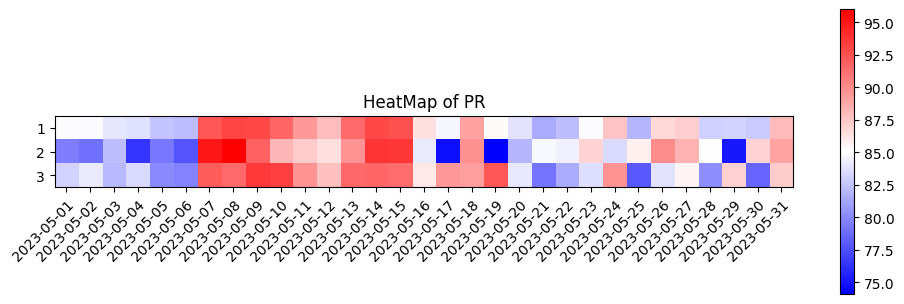

In [10]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

items = list(range(1,4))
date_list = data['date']

pr_data = np.array(inv_pr)

fig, ax = plt.subplots(figsize=(10,6)) #plt.subplots()
im = ax.imshow(pr_data, cmap='bwr')
cbar = ax.figure.colorbar(im,
                          ax = ax,
                          shrink=0.5 )

# We want to show all ticks...
ax.set_xticks(np.arange(len(date_list)))
ax.set_yticks(np.arange(len(items)))
# ... and label them with the respective list entries
ax.set_xticklabels(date_list)
ax.set_yticklabels(items)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("HeatMap of PR")
fig.tight_layout()
plt.show()

In [12]:
import plotly.express as px
import pandas as pd

map_data = [data['pr']]
map_data += data['inv_pr']
x_names = data['date']
y_names = ['AVG', 'INV1', 'INV2', 'INV3']
fig = px.imshow(map_data
               , labels = dict(x='date', y='inv', color='PR(%s)')
                , x = x_names
                , y = y_names
               )
fig.show()


- 顏色調整一下

In [13]:
import plotly.express as px
import pandas as pd

map_data = [data['pr']]
map_data += data['inv_pr']
x_names = data['date']
y_names = ['AVG', 'INV1', 'INV2', 'INV3']
fig = px.imshow(map_data
               , labels = dict(x='date', y='inv', color='PR(%s)')
                , x = x_names
                , y = y_names
                , color_continuous_scale='RdBu_r'
               )
fig.show()
